In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:

# Cargar el archivo CSV
file_path = '/app/resultados/results_HCP_105_without_CC_GCNEncoder_v2_v2.csv'  # Ajusta la ruta según sea necesario
df = pd.read_csv(file_path)

# Mostrar las primeras filas del dataframe
df.head()

# Configuración de estilos
sns.set(style="whitegrid")

# Función para crear gráficos de barras por métrica a nivel de sujeto
def plot_subject_level_metrics(df, metric):
    plt.figure(figsize=(14, 8))
    sns.barplot(x='subject_id', y=metric, data=df, ci=None)
    plt.xticks(rotation=90)
    plt.title(f'{metric.capitalize()} por Sujeto')
    plt.xlabel('Sujeto')
    plt.ylabel(metric.capitalize())
    plt.show()

# Función para crear gráficos de barras por métrica a nivel de tracto
def plot_tract_level_metrics(df, metric):
    plt.figure(figsize=(14, 8))
    sns.barplot(x='tract', y=metric, data=df, ci=None)
    plt.xticks(rotation=90)
    plt.title(f'{metric.capitalize()} por Tracto')
    plt.xlabel('Tracto')
    plt.ylabel(metric.capitalize())
    plt.show()

# Función para crear gráficos de caja por métrica a nivel de conjunto de datos
def plot_dataset_level_metrics(df, metrics):
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df[metrics])
    plt.title('Distribución de Métricas a Nivel de Conjunto de Datos')
    plt.xlabel('Métrica')
    plt.ylabel('Valor')
    plt.show()

# Función para calcular y mostrar estadísticas a nivel de conjunto de datos
def dataset_statistics(df, metrics):
    stats = df[metrics].describe().transpose()
    print(stats)
    return stats

# Crear gráficos a nivel de sujeto
metrics = ['accuracy', 'precision', 'recall', 'F1', 'AUCROC']
for metric in metrics:
    plot_subject_level_metrics(df, metric)

# Crear gráficos a nivel de tracto
for metric in metrics:
    plot_tract_level_metrics(df, metric)

# Crear gráfico de caja a nivel de conjunto de datos
plot_dataset_level_metrics(df, metrics)

# Calcular y mostrar estadísticas a nivel de conjunto de datos
dataset_stats = dataset_statistics(df, metrics)

# Crear un gráfico de dispersión interactivo para DICE y wDICE a nivel de tracto
fig = px.scatter(df, x='DICE', y='wDICE', color='tract', 
                 title='DICE vs wDICE por Tracto',
                 labels={'DICE': 'DICE', 'wDICE': 'wDICE'})

fig.show()

# Crear gráfico de barras a nivel de conjunto de datos para DICE y wDICE
plt.figure(figsize=(14, 8))
sns.barplot(x='tract', y='DICE', data=df, ci=None)
plt.xticks(rotation=90)
plt.title('DICE por Tracto')
plt.xlabel('Tracto')
plt.ylabel('DICE')
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x='tract', y='wDICE', data=df, ci=None)
plt.xticks(rotation=90)
plt.title('wDICE por Tracto')
plt.xlabel('Tracto')
plt.ylabel('wDICE')
plt.show()

# Calcular estadísticas a nivel de sujeto y tracto
subject_stats = df.groupby('subject_id')[metrics].mean()
tract_stats = df.groupby('tract')[metrics].mean()

# Mostrar estadísticas a nivel de sujeto y tracto
print("Estadísticas a nivel de sujeto:")
print(subject_stats)

print("Estadísticas a nivel de tracto:")
print(tract_stats)


In [2]:
# Calcular y mostrar todos los valores promedio de wDICE a nivel de tracto
tract_DICE_avg = df.groupby('tract')['DICE'].mean()
print(tract_DICE_avg)


tract
AF_left         0.490772
AF_right        0.568045
ATR_left        0.744954
ATR_right       0.751238
CA              1.000000
                  ...   
T_PREF_right    0.464603
T_PREM_left     0.909008
T_PREM_right    0.947954
UF_left         0.986538
UF_right        0.882790
Name: DICE, Length: 71, dtype: float64


In [3]:
# Calcular y mostrar los valores promedio de wDICE a nivel de tracto
tract_wDICE_avg = df.groupby('tract')['wDICE'].mean()
tract_wDICE_avg

tract
AF_left         0.590847
AF_right        0.639470
ATR_left        0.706423
ATR_right       0.712328
CA              1.000000
                  ...   
T_PREF_right    0.453806
T_PREM_left     0.860769
T_PREM_right    0.916211
UF_left         0.977482
UF_right        0.863712
Name: wDICE, Length: 71, dtype: float64

In [2]:
# Cargar archivo csv /app/resultados/results_HCP_105_without_CC_GCNEncoder_v2_v2.csv
file_path = '/app/resultados/results_HCP_105_without_CC_GCNEncoder_v2_v2_classif.csv'  # Ajusta la ruta según sea necesario
df = pd.read_csv(file_path)

df


,subject_id,tract,accuracy,precision,recall,F1,AUCROC,DICE,wDICE
0,687163,CC_1,0.286769,0.333333,0.286769,0.308303,0.0,0.872095,0.815108
1,687163,CST_left,0.318787,0.333333,0.318787,0.325898,0.0,0.983017,0.968782
2,687163,OR_left,0.000343,0.200000,0.000343,0.000685,0.0,0.075633,0.138286
3,687163,ST_OCC_left,0.156603,0.166667,0.156603,0.161478,0.0,0.695537,0.581564
4,687163,ILF_left,0.233552,0.250000,0.233552,0.241496,0.0,0.868285,0.840120
...,...,...,...,...,...,...,...,...,...
1485,638049,T_POSTC_left,0.163549,0.166667,0.163549,0.165093,0.0,0.786072,0.735592
1486,638049,T_PREM_right,0.327576,0.333333,0.327576,0.330430,0.0,0.869764,0.850824
1487,638049,IFO_left,0.249785,0.250000,0.249785,0.249892,0.0,0.920851,0.889751
1488,638049,CA,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


## Weighted DICE metrics per tract

/tmp/ipykernel_456976/3453599749.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tract_wDICE_avg.values, y=tract_wDICE_avg.index, palette='viridis')


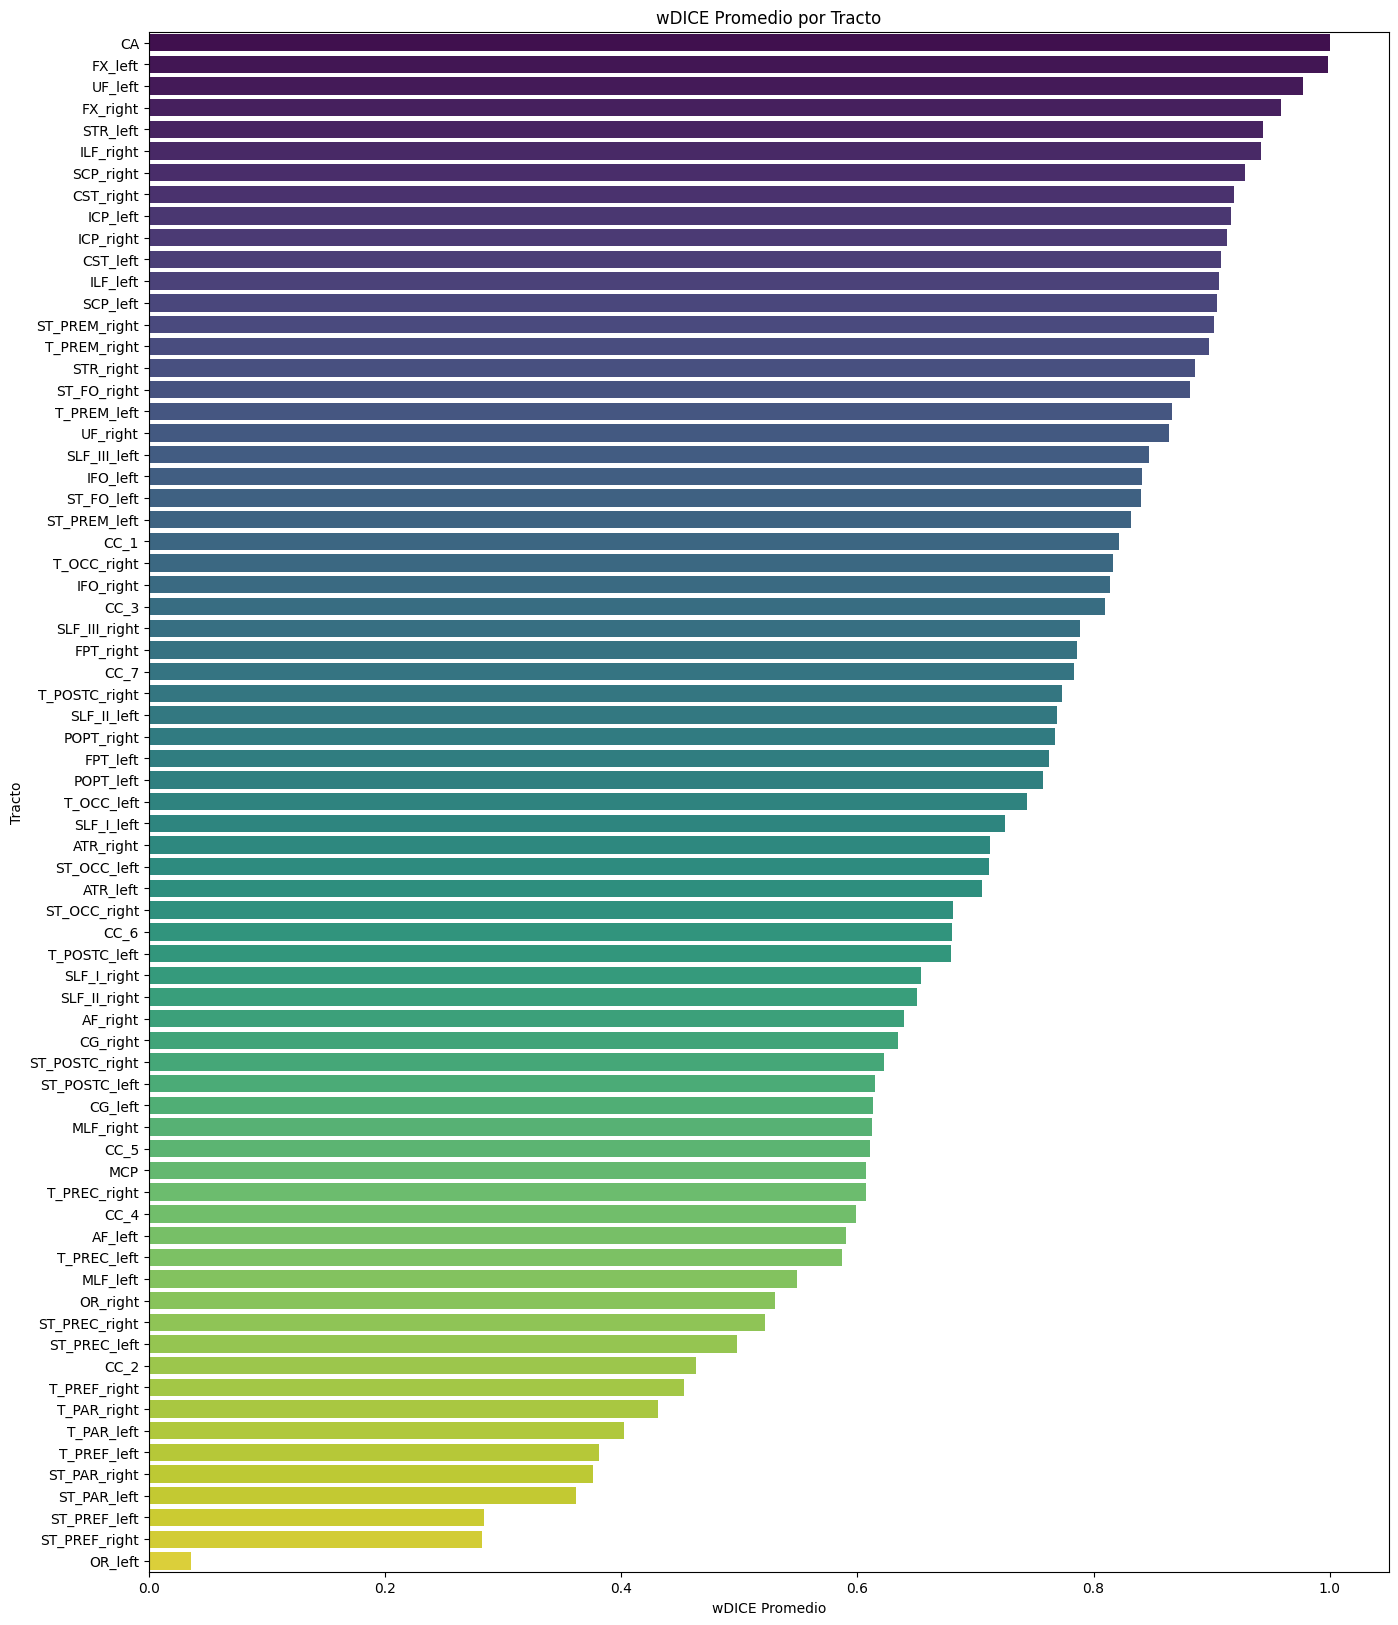

In [3]:
# Calcular la media de wDICE para cada tracto
tract_wDICE_avg = df.groupby('tract')['wDICE'].mean()
# Ordenar los valores promedio de wDICE de mayor a menor
tract_wDICE_avg = tract_wDICE_avg.sort_values(ascending=False)

# Crear un gráfico de barras horizontales para mostrar los valores promedio de wDICE por tracto
plt.figure(figsize=(16, 20))
sns.barplot(x=tract_wDICE_avg.values, y=tract_wDICE_avg.index, palette='viridis')
plt.xlabel('wDICE Promedio')
plt.ylabel('Tracto')
plt.title('wDICE Promedio por Tracto')
plt.show()

## DICE metrics per tract

/tmp/ipykernel_456976/667507015.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tract_DICE_avg.values, y=tract_DICE_avg.index, palette='viridis')


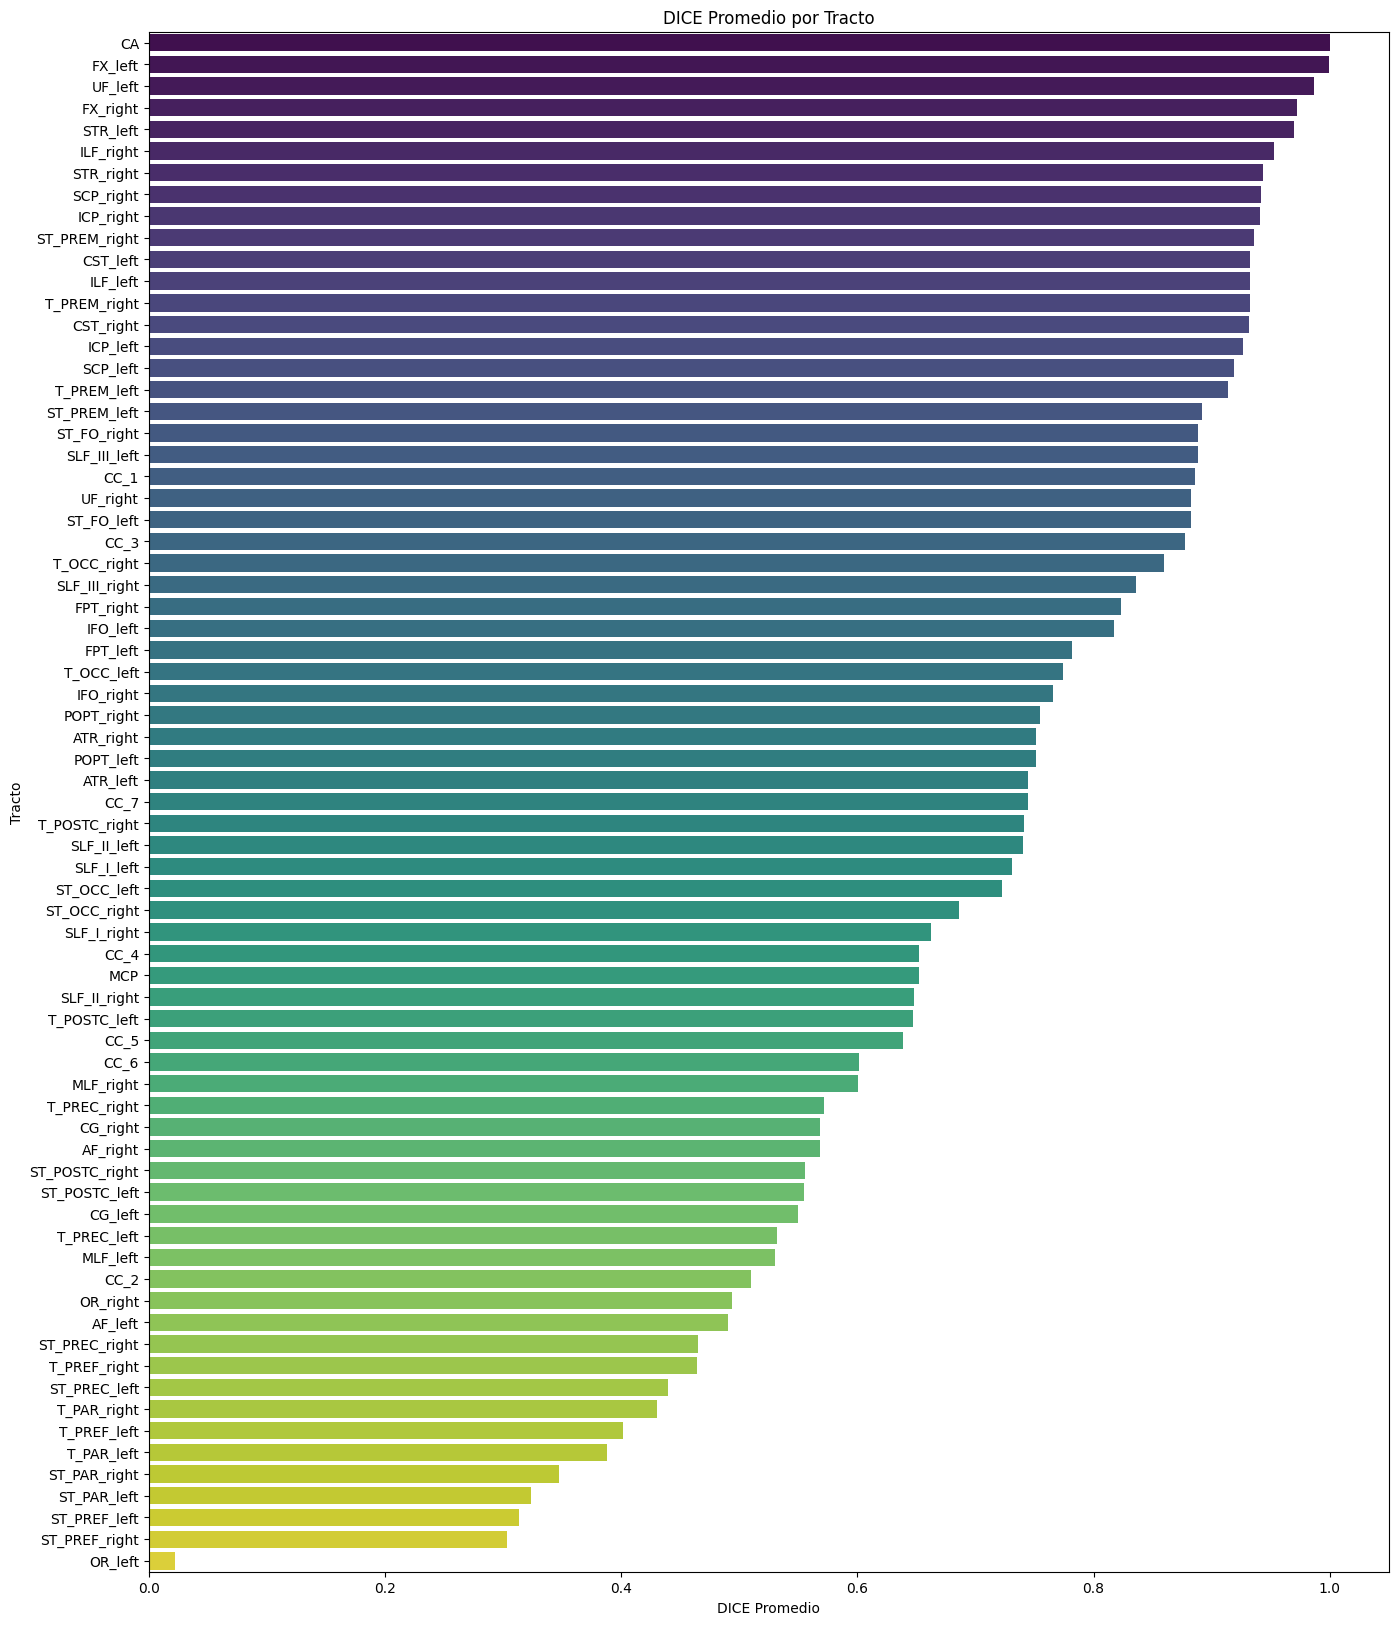

In [4]:
# Calcular la media de wDICE para cada tracto
tract_DICE_avg = df.groupby('tract')['DICE'].mean()
# Ordenar los valores promedio de wDICE de mayor a menor
tract_DICE_avg = tract_DICE_avg.sort_values(ascending=False)

# Crear un gráfico de barras horizontales para mostrar los valores promedio de wDICE por tracto
plt.figure(figsize=(16, 20))
sns.barplot(x=tract_DICE_avg.values, y=tract_DICE_avg.index, palette='viridis')
plt.xlabel('DICE Promedio')
plt.ylabel('Tracto')
plt.title('DICE Promedio por Tracto')
plt.show()
